## Verificacion del funcionamiento del SDK de Python

Se procede a verificar el correcto funcionamiento de todas las funciones que forman parte de este SDK, las cuales se encuentran dentro del módulo MakeSens.py.

#### Funcion download_data()

Descarga y procesa datos de un dispositivo en un rango de fechas especificado.

Esta función descarga datos de un dispositivo utilizando la API de Makesens, procesa los datos descargados y
devuelve un DataFrame. Si se proporciona un formato, también guarda los datos en un archivo con ese formato.

Args:
- id_device (str): ID del dispositivo desde el cual se descargan los datos.
- start_date (str): Fecha y hora de inicio en formato 'YYYY-MM-DD HH:MM:SS'.
- end_date (str): Fecha y hora de fin en formato 'YYYY-MM-DD HH:MM:SS'.
- sample_rate (str): Tasa de muestreo para los datos ('m' para minutos, 'h' para horas, 'd' para días).
- format (str, optional): Formato para guardar los datos descargados ('csv' o 'xlsx'). Por defecto None.
- fields (str, optional): Lista de campos específicos a descargar. Por defecto None (todos los campos).

Returns:
- pd.DataFrame: DataFrame con los datos descargados.

Ejemplo:
- data = download_data('device123', '2023-01-01 00:00:00', '2023-01-02 00:00:00', 'h', 'csv', 'pm10_1')


In [1]:
#Se carga el motodo
from MakeSens import download_data


In [2]:
#parametros basicos
data_T = download_data('mE1_00003', '2023-08-01 00:00:00', '2023-08-20 00:00:00', '1T')
data_H = download_data('mE1_00003', '2023-08-01 00:00:00', '2023-08-20 00:00:00', '1H')
data_w = download_data('mE1_00003', '2023-08-01 00:00:00', '2023-08-20 00:00:00', '1W')

In [13]:
data_w

,ts,humedad,humedad2,pm10_1,pm10_1_ae,pm10_2,pm10_2_ae,pm1_1,pm1_1_ae,pm1_2,...,pm_n_10_0_2,pm_n_1_0_1,pm_n_1_0_2,pm_n_2_5_1,pm_n_2_5_2,pm_n_5_0_1,pm_n_5_0_2,presion,temperatura,temperatura2
0,2023-08-06,89.509434,69.782064,18.701397,18.610042,23.235294,23.235294,11.287656,11.101170,14.058824,...,0.705882,103.967535,131.705882,13.444319,16.000000,1.371083,1.764706,2.387346e+13,-2.476110e+06,26.455410
1,2023-08-13,88.586957,73.820627,16.574728,16.529891,20.000000,20.000000,10.114130,9.945652,11.000000,...,2.000000,92.089674,122.000000,11.858696,14.000000,1.100543,2.000000,6.853467e+13,-2.485184e+06,25.718467
2,2023-08-13,88.432268,67.429039,13.853659,13.814024,17.615385,17.615385,8.347561,8.323171,10.923077,...,0.769231,76.535061,89.230769,10.478659,13.384615,1.082317,1.846154,3.838531e+13,-2.317241e+06,26.628990
3,2023-08-20,88.698885,71.355955,13.662082,13.656134,8.857143,8.857143,8.067286,8.053532,5.593407,...,0.395604,74.107435,44.593407,10.817844,7.318681,1.263941,0.725275,2.873758e+13,-2.442296e+06,25.455504


In [5]:
print(f'#datos minutal = {len(data_T)}')
print(f'#datos horario = {len(data_H)}')
print(f'#datos semanal = {len(data_w)}')

#datos minutal = 9462
#datos horario = 447
#datos semanal = 4


In [14]:
data_T_var = download_data('mE1_00003', '2023-08-01 00:00:00', '2023-08-20 00:00:00', '1T',fields='humedad,pm10_2')
data_H_var = download_data('mE1_00003', '2023-08-01 00:00:00', '2023-08-20 00:00:00', '1H',fields='temperatura2,humedad2')
data_w_var = download_data('mE1_00003', '2023-08-01 00:00:00', '2023-08-20 00:00:00', '1W',fields='pm10_1,pm10_2_ae')

In [16]:
data_T_var[-3:-1]

,ts,humedad,pm10_2
9461,2023-08-19 17:04:00,0.0,NaN
9462,2023-08-19 17:07:00,100.0,NaN


In [17]:
print(f'#datos minutal = {len(data_T_var)}')
print(f'#datos horario = {len(data_H_var)}')
print(f'#datos semanal = {len(data_w_var)}')

#datos minutal = 9464
#datos horario = 447
#datos semanal = 4


In [10]:
download_data('mE1_00003', '2023-08-01 00:00:00', '2023-08-19 00:00:00', '1T','csv',fields='humedad,pm10_2')
download_data('mE1_00003', '2023-08-01 00:00:00', '2023-08-19 00:00:00', '1H','xlsx',fields='humedad,pm10_2')
download_data('mE1_00003', '2023-08-01 00:00:00', '2023-08-19 00:00:00', '1W','csv',fields='humedad,pm10_2')

,ts,humedad,pm10_2
0,2023-08-06,89.509434,23.235294
1,2023-08-13,88.586957,20.000000


**NOTA**: Dado que la funcion download_data() esta en perfecto funcionamiento y como ella utiliza las funciones __convert_measurements() y __save_data(), entonces se puede decir que estas tambien funcionan bien.

#### Funcion gradient_pm10()

Descarga, procesa y visualiza los datos PM10 de un dispositivo en un gráfico de gradiente.

Esta función descarga los datos PM10 de un dispositivo en el período especificado, los procesa y crea un gráfico
de gradiente utilizando la función '__gradient_plot'. La escala y la tasa de muestreo se configuran según la necesidad.

Args:
- id_device (str): ID del dispositivo desde el cual se descargan los datos.
- start_date (str): Fecha y hora de inicio en formato 'YYYY-MM-DD HH:MM:SS'.
- end_date (str): Fecha y hora de fin en formato 'YYYY-MM-DD HH:MM:SS'.
- sample_rate (str): Tasa de muestreo ('m' para minutos, 'w' para semanas).

Returns:
- None

Ejemplo:
- gradient_pm10('mE1_00003', '2023-01-01 00:00:00', '2023-01-02 00:00:00', '1h')


In [26]:
#Se carga el motodo
from MakeSens import gradient_pm10
from MakeSens import gradient_pm2_5

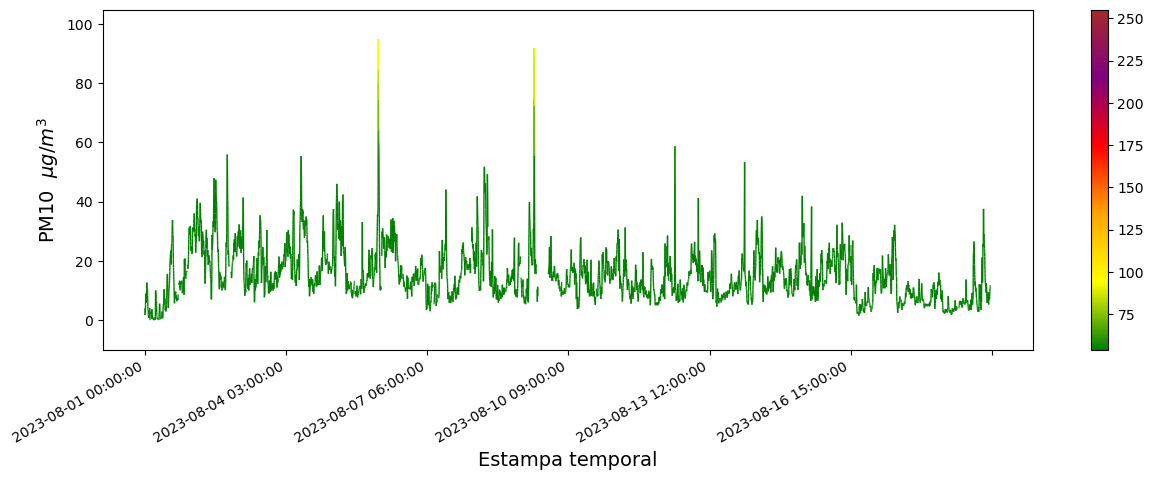

In [21]:
gradient_pm10('mE1_00003', '2023-08-01 00:00:00', '2023-08-20 00:00:00', '9T')

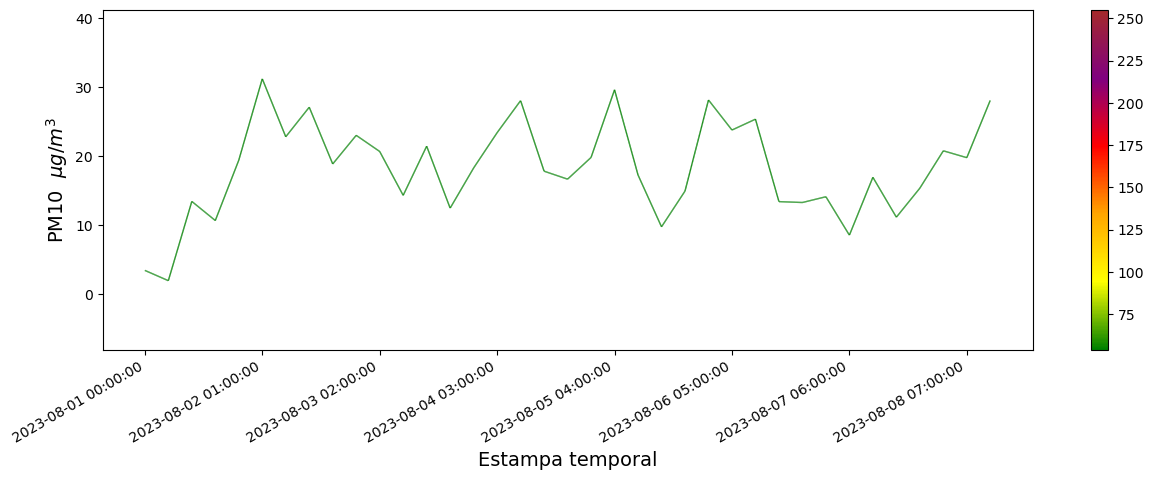

In [22]:
gradient_pm10('mE1_00003', '2023-08-01 00:00:00', '2023-08-20 00:00:00', '5H')

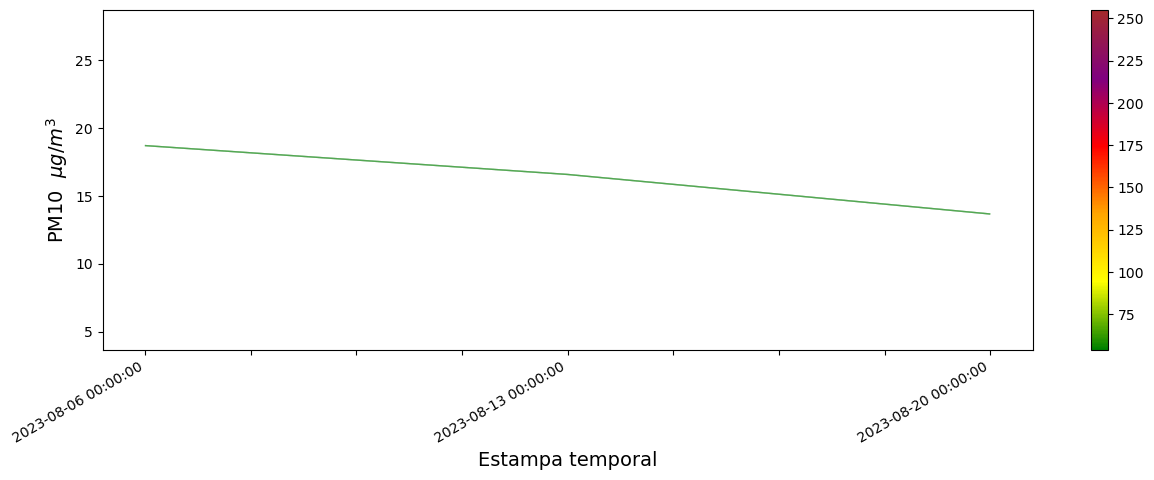

In [23]:
gradient_pm10('mE1_00003', '2023-08-01 00:00:00', '2023-08-19 00:00:00', '1W')

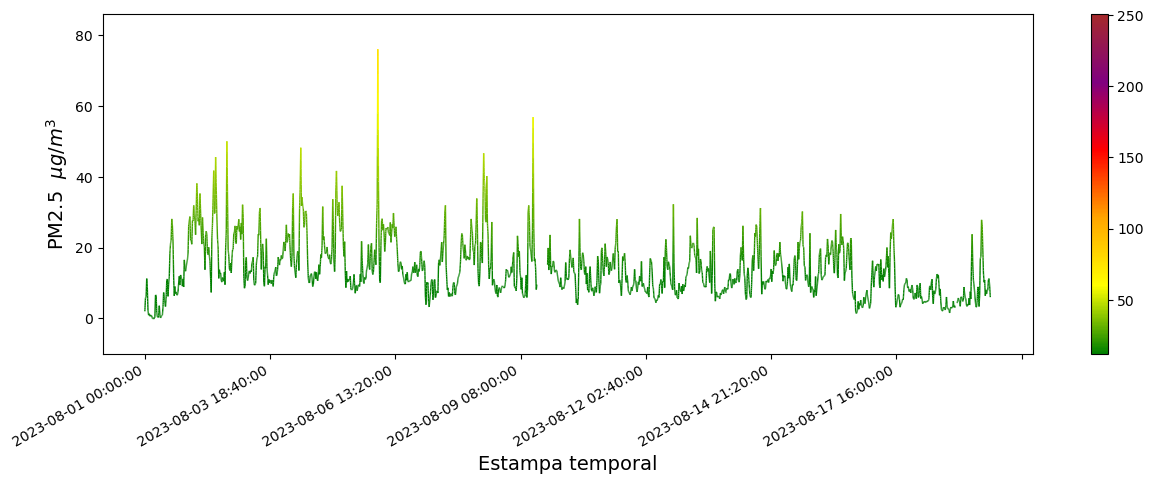

In [40]:
gradient_pm2_5('mE1_00003', '2023-08-01 00:00:00', '2023-08-20 00:00:00', '20T')

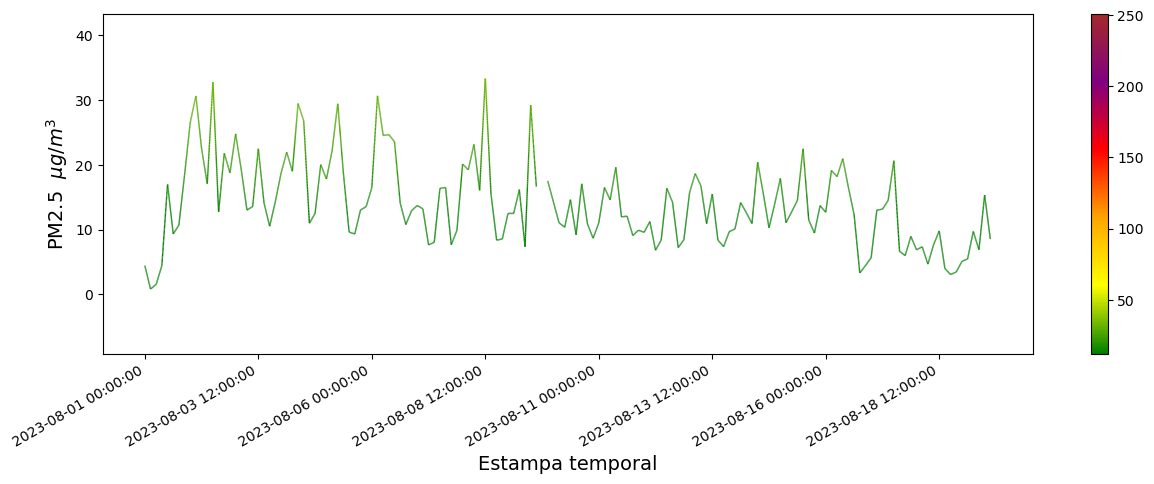

In [28]:
gradient_pm2_5('mE1_00003', '2023-08-01 00:00:00', '2023-08-20 00:00:00', '3H')

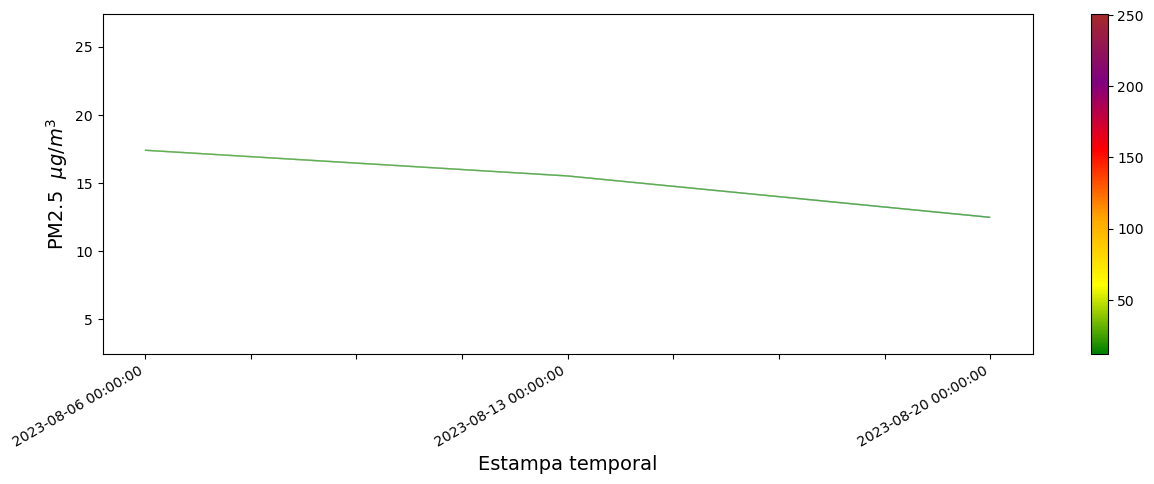

In [29]:
gradient_pm2_5('mE1_00003', '2023-08-01 00:00:00', '2023-08-20 00:00:00', '1W')

**Nota**: Las funciones de gradiante funcionan perfecto.

#### Funcion heatmap_pm10()
Crea un mapa de calor para los datos PM10 de un dispositivo.

Esta función descarga los datos PM10 de un dispositivo en un rango de fechas especificado y crea un mapa de calor
para visualizar la variación de los datos a lo largo de las horas y las fechas.

Args:
- id_device (str): ID del dispositivo desde el cual se descargan los datos.
- start_date (str): Fecha y hora de inicio en formato 'YYYY-MM-DD HH:MM:SS'.
- end_date (str): Fecha y hora de fin en formato 'YYYY-MM-DD HH:MM:SS'.

Returns:
- None

Ejemplo:
- heatmap_pm10('mE1_00003', '2023-01-01 00:00:00', '2023-01-02 00:00:00')


In [31]:
#Se carga el motodo
from MakeSens import heatmap_pm10
from MakeSens import heatmap_pm2_5

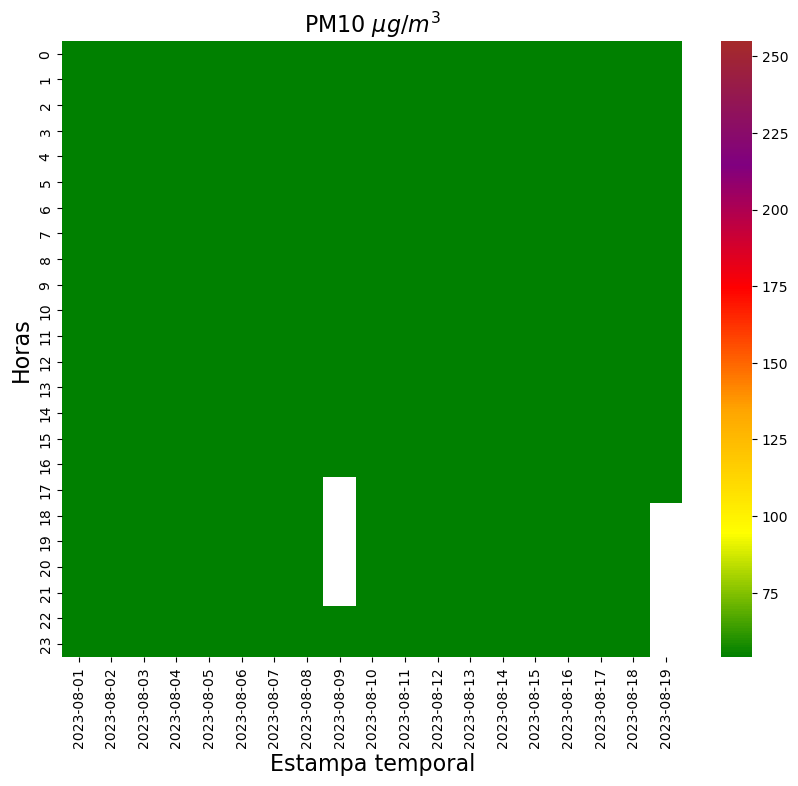

In [34]:
heatmap_pm10('mE1_00003','2023-08-01 00:00:00', '2023-08-20 00:00:00')

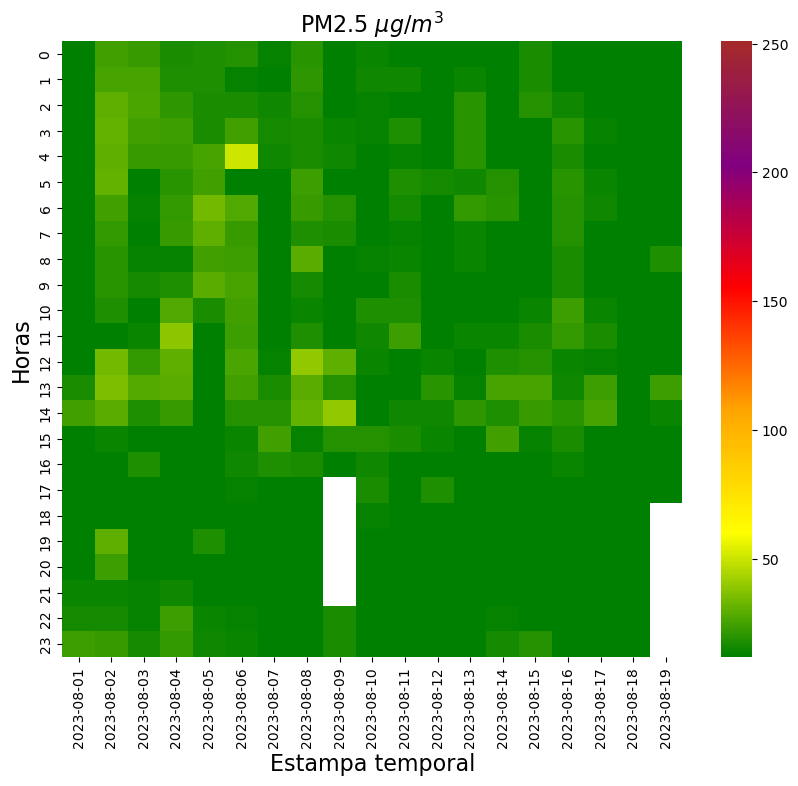

In [35]:
heatmap_pm2_5('mE1_00003','2023-08-01 00:00:00', '2023-08-20 00:00:00')

**Nota**: Las funciones de mapa de intensidad funcionana muy bien.

### Funcion weekly_profile()
Crea un perfil semanal para un campo específico de un dispositivo.

Esta función descarga los datos de un campo específico de un dispositivo en un rango de fechas y crea un perfil
semanal que muestra cómo varían los datos a lo largo de los días de la semana y las horas del día.

Args:
- id_device (str): ID del dispositivo desde el cual se descargan los datos.
- start_date (str): Fecha y hora de inicio en formato 'YYYY-MM-DD HH:MM:SS'.
- end_date (str): Fecha y hora de fin en formato 'YYYY-MM-DD HH:MM:SS'.
- field (str): Campo específico para el cual se creará el perfil (p.ej. 'PM10' o 'PM2.5').

Returns:
- None

Ejemplo:
- weekly_profile('mE1_00003', '2023-01-01 00:00:00', '2023-01-07 23:59:59', 'PM10')

In [36]:
#Se carga el motodo
from MakeSens import weekly_profile

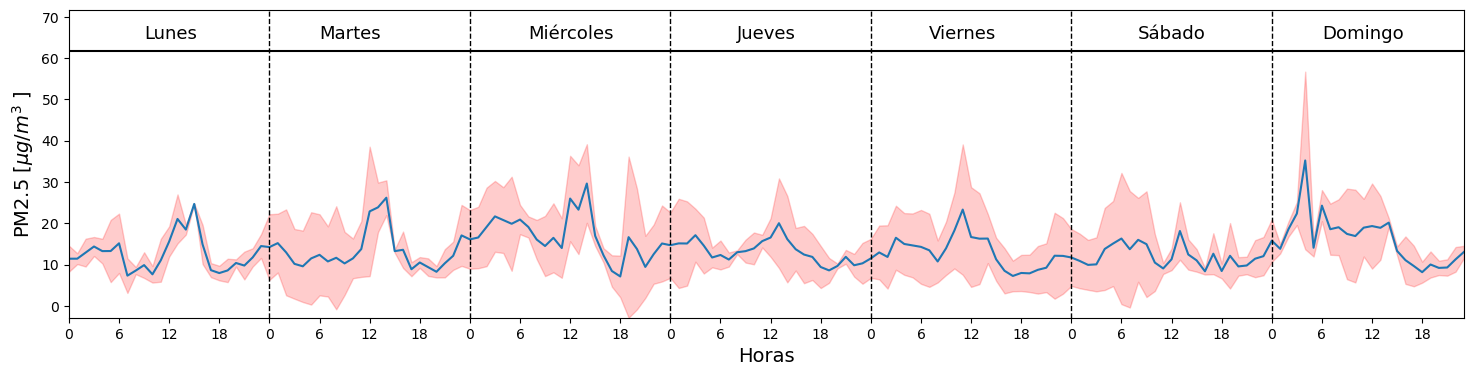

In [39]:
weekly_profile('mE1_00003','2023-08-01 00:00:00', '2023-08-20 00:00:00', 'PM2.5')